# Librerías

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score,explained_variance_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler

from plotly.subplots import make_subplots
import plotly.express as px
from matplotlib import colormaps
import re

# Lectura de Datos

In [2]:
datosOPF = pd.read_csv('dataset.csv',header=None)
datosOPF.head()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,55.347,19.178,24.461,35.694,0,39.316,22.728,25.232,0,0,...,40.471,40.292,39.731,40.801,39.829,40.439,40.447,38.778,40.262,40.718
1,68.257,23.043,37.473,56.098,0,47.882,16.438,37.758,0,0,...,40.383,40.264,39.701,40.990,39.790,40.390,40.383,38.249,40.851,40.698
2,49.366,26.603,52.136,47.119,0,44.639,12.473,34.415,0,0,...,40.401,40.236,39.671,40.595,39.996,40.401,40.405,38.544,41.257,40.828
3,76.195,13.548,54.495,31.687,0,40.881,10.135,31.870,0,0,...,39.805,39.705,39.165,40.291,39.799,40.596,40.599,38.089,40.789,40.881
4,54.804,19.101,45.123,28.032,0,65.770,12.568,25.322,0,0,...,40.235,40.185,39.619,40.786,39.792,40.480,40.499,37.696,40.389,40.293


## EDA

In [3]:
datosOPF.describe()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.00000,1000.000000,1000.000000,1000.0,1000.0,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,51.025123,19.904502,39.481376,38.715308,0.0,51.56094,18.768560,27.579996,0.0,0.0,...,40.196210,40.108032,39.548118,40.707573,39.771368,40.398245,40.404326,37.994733,40.668140,40.419831
std,14.775594,5.661968,11.119501,10.963833,0.0,14.75276,5.526369,8.087310,0.0,0.0,...,0.210675,0.200028,0.191775,0.256293,0.157224,0.234135,0.237643,0.336445,0.319807,0.311227
min,25.502000,10.009000,19.514000,19.592000,0.0,26.00200,9.512000,14.052000,0.0,0.0,...,39.233000,39.200000,38.674000,40.016000,38.783000,39.053000,39.043000,36.787000,39.446000,38.575000
25%,38.700250,15.175500,30.355500,29.318500,0.0,38.68425,13.795750,20.682000,0.0,0.0,...,40.087000,40.014000,39.458750,40.509000,39.679750,40.278000,40.280000,37.783250,40.447250,40.254000
50%,50.433000,19.891000,39.402500,38.725000,0.0,51.21600,18.677000,26.929500,0.0,0.0,...,40.233000,40.130500,39.569000,40.711000,39.785000,40.409500,40.413500,38.011000,40.674000,40.449500
75%,63.498500,24.832750,49.282500,48.137250,0.0,65.18500,23.649000,34.600750,0.0,0.0,...,40.340250,40.246000,39.680000,40.907000,39.877000,40.556000,40.566250,38.221250,40.909000,40.624000
max,76.494000,29.945000,58.445000,58.488000,0.0,77.99900,28.492000,41.999000,0.0,0.0,...,40.636000,40.549000,39.970000,41.268000,40.130000,40.927000,40.936000,38.912000,41.472000,41.235000


In [4]:
X = datosOPF.iloc[:,0:118].to_numpy()
Y = datosOPF.iloc[:,118:236].to_numpy()
print("X:", X.shape, "Y:", Y.shape)

X: (1000, 118) Y: (1000, 118)


In [5]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.15, random_state=42)
print("X train:", X_train.shape, "X test:", X_test.shape)
print("Y train:", y_train.shape, "Y test:", y_test.shape)

X train: (850, 118) X test: (150, 118)
Y train: (850, 118) Y test: (150, 118)


## Gráficas de variación de Cargas (Montecarlo)

In [6]:
colormap = colormaps["gist_rainbow"] #choose any matplotlib colormap here
colorspan=[40,140]
N = 4000
a = np.random.random(size=N) * 100
b = np.random.random(size=N) * 100
cmap_input=np.interp(np.sqrt(a*a+b*b),colorspan,[0,1],left=0,right=1)
A_color=colormap(cmap_input,1,True)
bokeh_colors = bokeh_colors = ["#%02x%02x%02x" % (int(r * 255), int(g * 255), int(b * 255)) for r, g, b in A_color[:, 0:3]]

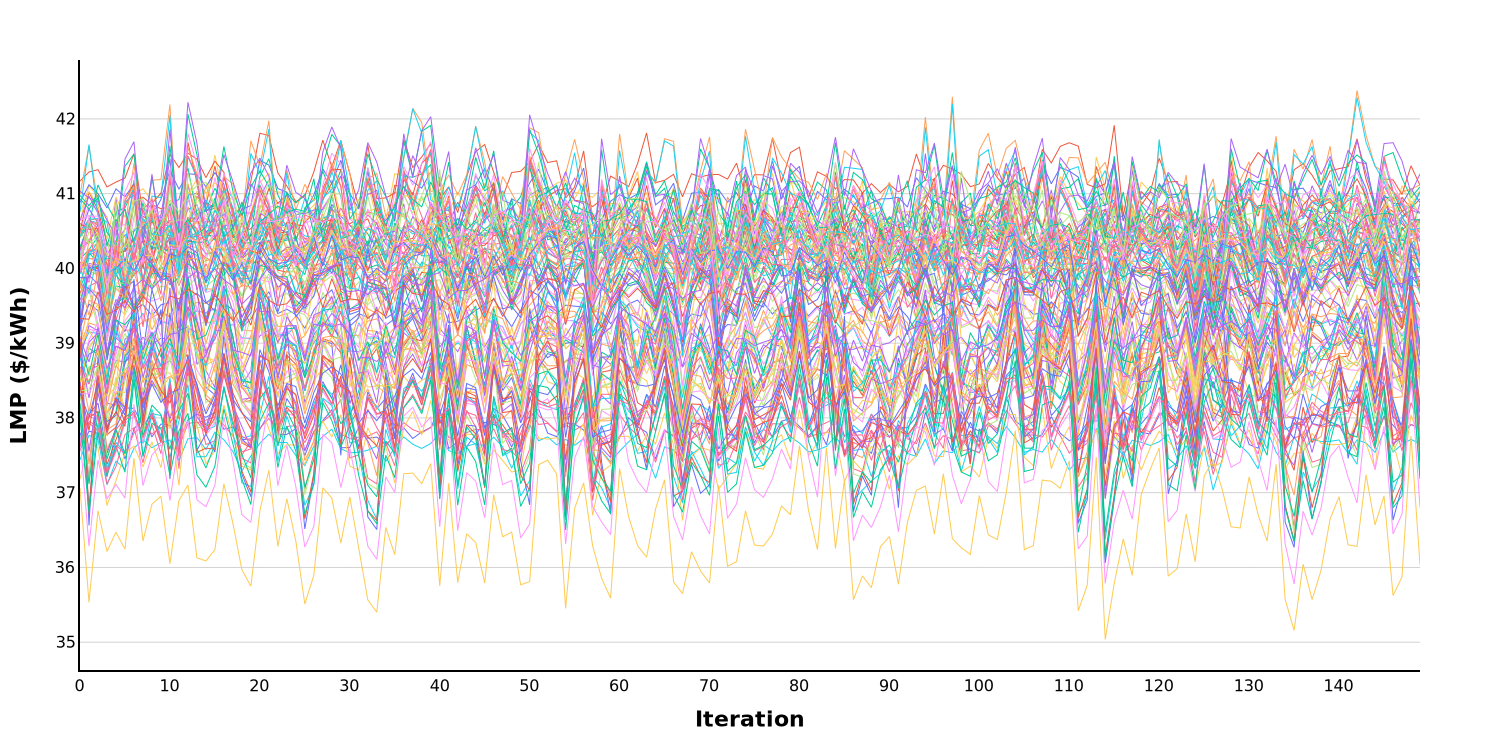

In [7]:
figLMC = px.line()

for i in range(X_test.shape[1]):
    figLMC.add_scatter(y=y_test[:, i], mode='lines', line=dict(width=1))

figLMC.update_xaxes(title_text='<b>Iteration</b>', title_font_size=22, tickfont_size=16, tickmode='linear', tick0=0, dtick=10)
figLMC.update_yaxes(title_text='<b>LMP ($/kWh)</b>', title_font_size=22, tickfont_size=16)

figLMC.update_layout(width=1500,
                     height=750,
                     paper_bgcolor='rgba(0,0,0,0)',
                     plot_bgcolor='rgba(0,0,0,0)',
                     yaxis=dict(color="black"),
                     xaxis=dict(color="black"),
                     showlegend=False
                     )
figLMC.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
figLMC.update_yaxes(showline=True, linewidth=2, gridcolor='lightgray', linecolor='black', mirror=False)

figLMC.show("svg")

# SVR

## Ajuste de Hiperparametros

In [8]:
param_grid = {'estimator__C': np.logspace(-1,1,5),
              'estimator__epsilon':[0.1, 0.2, 0.3, 0.4]}

svr = SVR()
mor = RandomizedSearchCV(MultiOutputRegressor(svr), n_jobs=-1, cv=4, param_distributions=param_grid, n_iter=5, random_state=42, scoring='neg_mean_absolute_error')
mor.fit(X_train, y_train)
mor.best_params_, mor.best_score_

({'estimator__epsilon': 0.1, 'estimator__C': 1.0}, -0.07591915866375584)

## Ajuste del Modelo

In [9]:
svrO= SVR(epsilon=mor.best_params_["estimator__epsilon"],C=mor.best_params_["estimator__C"])
mulout = MultiOutputRegressor(svrO)
mulout.fit(X_train,y_train)
y_pred = mulout.predict(X_test)

In [10]:
aux = range(0, y_pred.shape[0])
y_pred_train = mulout.predict(X_train)

# Evaluación del Modelo

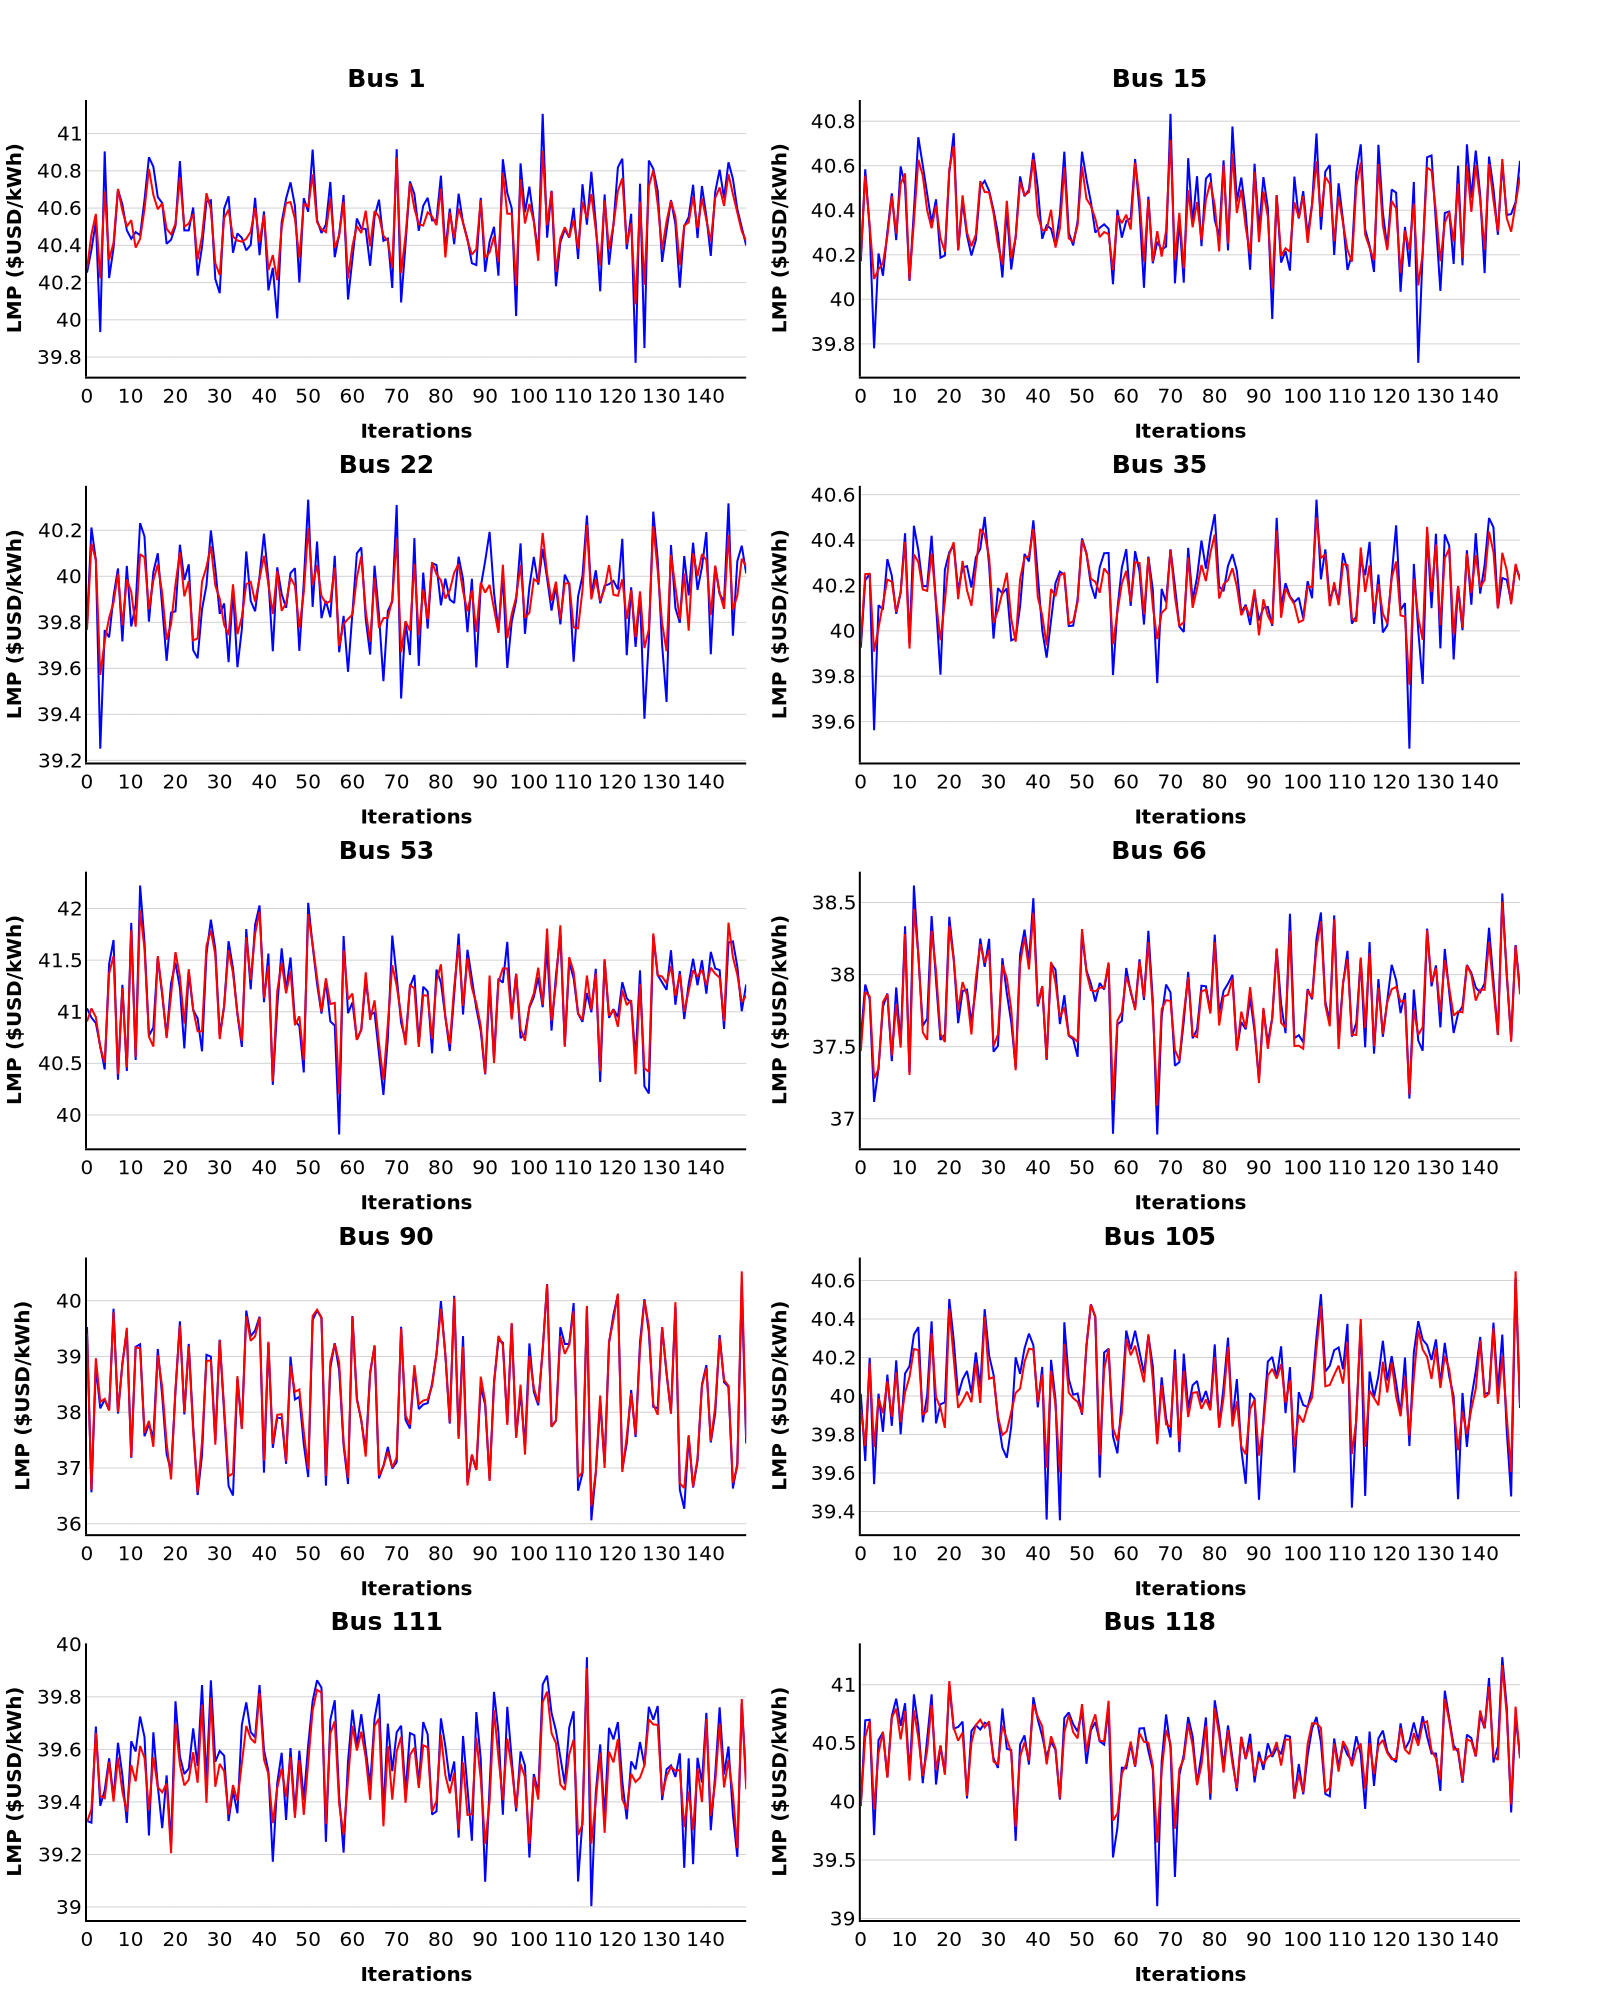

In [11]:
y_test_sample = y_test[:, [0, 14, 21, 34, 52, 65, 89, 104, 110, 117]]
y_pred_sample = y_pred[:, [0, 14, 21, 34, 52, 65, 89, 104, 110, 117]]

figLMP1B = make_subplots(rows=5, cols=2, subplot_titles=['<b>Bus 1</b>', '<b>Bus 15</b>', '<b>Bus 22</b>', '<b>Bus 35</b>', '<b>Bus 53</b>',
                                                         '<b>Bus 66</b>', '<b>Bus 90</b>', '<b>Bus 105</b>', '<b>Bus 111</b>', '<b>Bus 118</b>'],
                         vertical_spacing=0.06, horizontal_spacing=0.08)

for i in range(10):
    row = (i // 2) + 1
    col = (i % 2) + 1
    figLMP1B.add_trace(px.line(x=range(len(y_test_sample)), y=y_test_sample[:, i], line_shape='linear', color_discrete_sequence=["blue"]).data[0], row=row, col=col)
    figLMP1B.add_trace(px.line(x=range(len(y_pred_sample)), y=y_pred_sample[:, i], line_shape='linear', color_discrete_sequence=["red"]).data[0], row=row, col=col)

# Configurar el diseño de la figura
figLMP1B.update_layout(width=1600,
                       height=2000,
                       paper_bgcolor='rgba(0,0,0,0)',
                       plot_bgcolor='rgba(0,0,0,0)',
                       showlegend=False,
                       font=dict(size=20, color="Black"),
                       )

# Configurar ejes x y y
figLMP1B.update_xaxes(tickmode='linear', tick0=0, dtick=10, color="black", showline=True, linewidth=2, linecolor='black', mirror=False,
                      title='<b>Iterations</b>', titlefont_size=20)
figLMP1B.update_yaxes(color="black", showline=True, linewidth=2, gridcolor='lightgray', linecolor='black', mirror=False,
                       title='<b>LMP ($USD/kWh)</b>', titlefont_size=20)

# Configurar anotaciones
figLMP1B.update_annotations(dict(font_size=25, borderpad=5, xshift=-30))

# Mostrar la figura
figLMP1B.show("svg")

In [12]:
error = ((y_pred - y_test)/y_test)*100

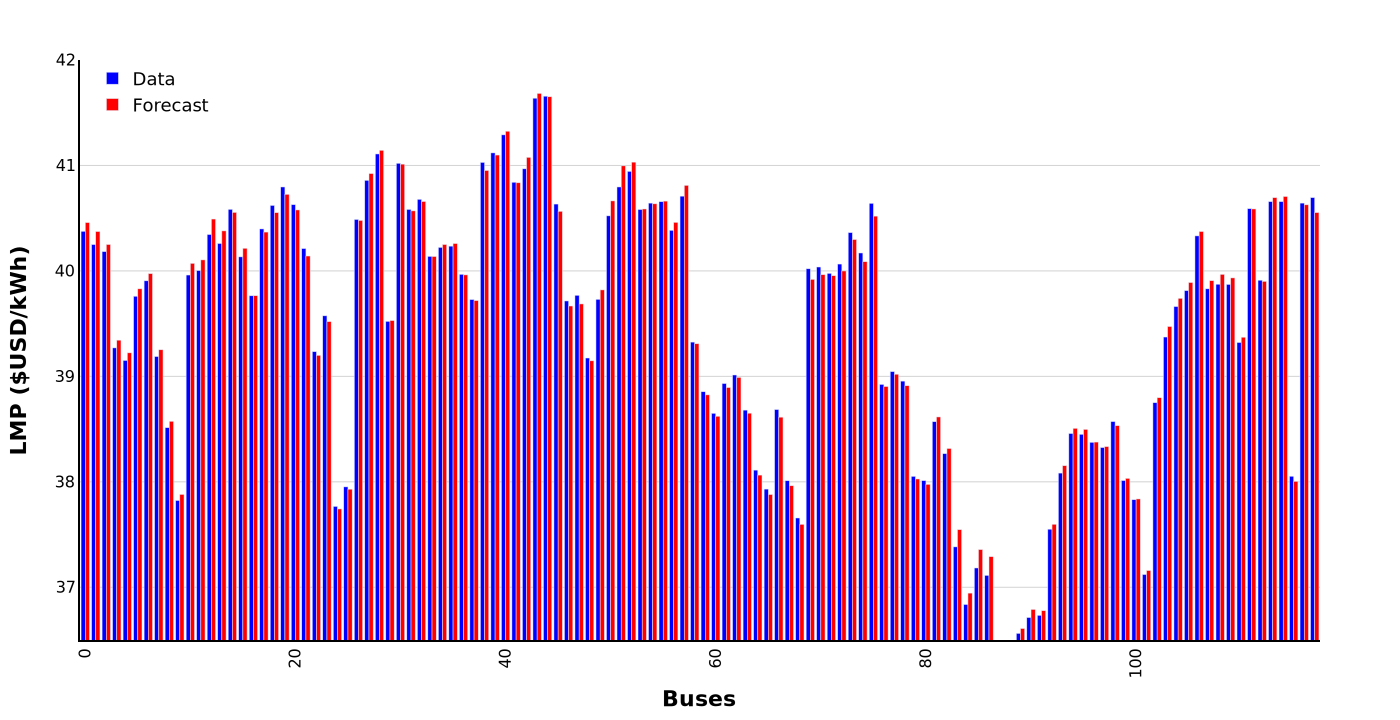

In [13]:
figLMP = px.bar(x=list(range(0, 118)), y=[y_test[1, :], y_pred[1, :]],
                color_discrete_sequence=["blue","red"], barmode='group', labels=["3","2"])
figLMP.update_layout(width=1400, height=720,
                     paper_bgcolor='rgba(0,0,0,0)',
                     plot_bgcolor='rgba(0,0,0,0)',
                     yaxis=dict(
                        title='<b>LMP ($USD/kWh)</b>',
                        titlefont_size=22,
                        tickfont_size=16,
                        color="black",
                        range=[36.5, 42]
                     ),
                     xaxis=dict(
                        title='<b>Buses</b>',
                        titlefont_size=22,
                        tickfont_size=16,
                        color="black",
                        tickangle=270
                     ),
                     legend=dict(
                         x=0.01,
                         y=1.0,
                         font=dict(size=18, color="black")
                     ),legend_title="")
figLMP.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
figLMP.update_yaxes(showline=True, linewidth=2, gridcolor='lightgray', linecolor='black', mirror=False)
newnames = {'wide_variable_0':'Data', 'wide_variable_1': 'Forecast'}
figLMP.for_each_trace(lambda t: t.update(name = newnames[t.name]))
figLMP.show("svg")

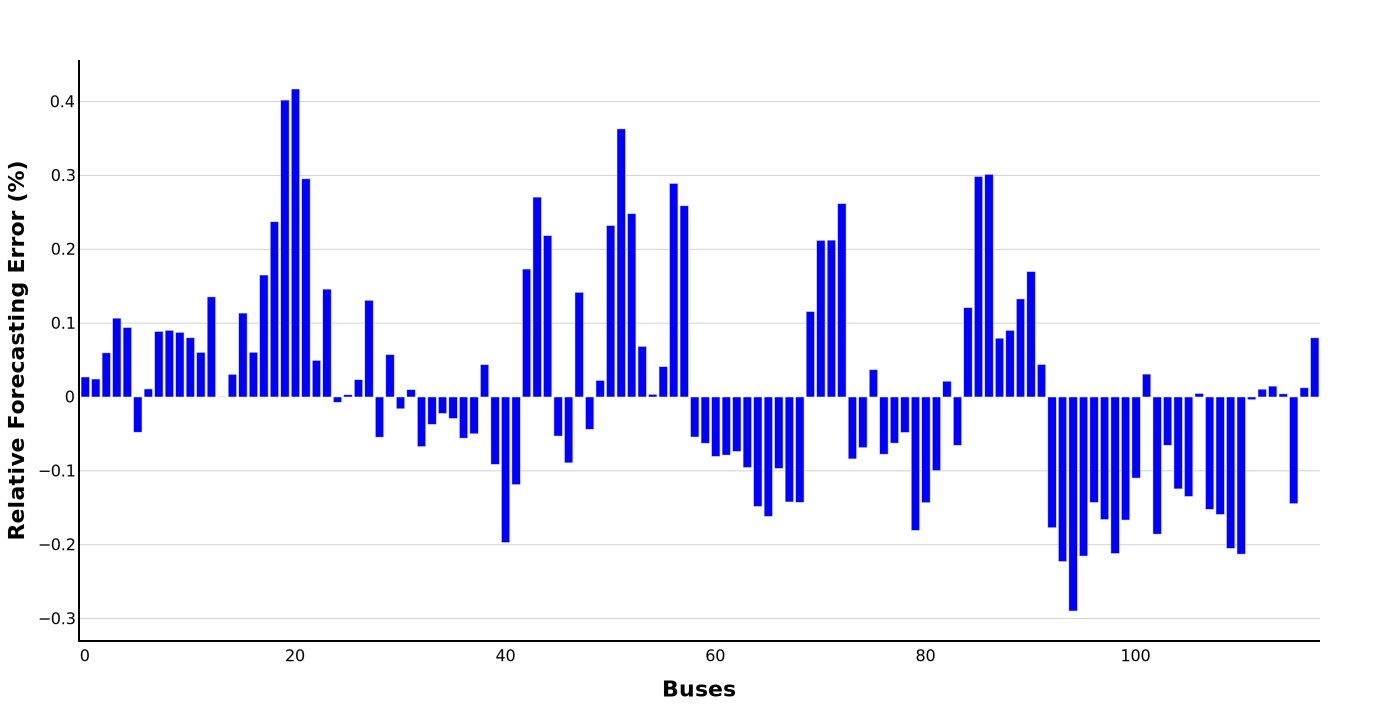

In [14]:
error_data = error[20, :]
bus_numbers = list(range(0, 118))

# Crear figura de barras con Plotly Express
figerror = px.bar(x=bus_numbers, y=error_data, color_discrete_sequence=['blue'])

# Configurar diseño de la figura
figerror.update_layout(barmode='group',
                      width=1400,
                      height=720,
                      paper_bgcolor='rgba(0,0,0,0)',
                      plot_bgcolor='rgba(0,0,0,0)',
                      yaxis=dict(title='<b>Relative Forecasting Error (%)</b>', titlefont_size=22, tickfont_size=16, color="black"),
                      xaxis=dict(title='<b>Buses</b>', titlefont_size=22, tickfont_size=16, color="black"),
                      legend=dict(x=0, y=1.0, font=dict(size=18, color="black"))
                      )

# Configurar ejes x y y
figerror.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
figerror.update_yaxes(showline=True, linewidth=2, gridcolor='lightgray', linecolor='black', mirror=False)

# Mostrar la figura
figerror.show("svg")

# Métricas de Rendimiento

In [15]:
print("MSE:",mean_squared_error(y_train,y_pred_train))
print("RMSE:",math.sqrt(mean_squared_error(y_train,y_pred_train)))
print("MAE:",mean_absolute_error(y_train,y_pred_train))
print("MAPE:",mean_absolute_percentage_error(y_train,y_pred_train)*100)
print("R2:", r2_score(y_train,y_pred_train))
print("Explained Variance:", explained_variance_score(y_train,y_pred_train))

MSE: 0.00636024044005675
RMSE: 0.0797511156038381
MAE: 0.06232412031324056
MAPE: 0.15796975417401468
R2: 0.9192486434059423
Explained Variance: 0.9224671556507307


In [16]:
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred)*100)
print("R2:", r2_score(y_test,y_pred))
print("Explained Variance:", explained_variance_score(y_test,y_pred))

MSE: 0.008324357984623432
RMSE: 0.09123791966404886
MAE: 0.0678871402040861
MAPE: 0.1722047566125368
R2: 0.9004272221027171
Explained Variance: 0.9023852496858494


In [17]:
values = error[error>0]
len(values)

8142

# Caso Adicional

In [18]:
datOPFind = pd.read_csv('datasetInd.csv',header=None)
datOPFind.head()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,31.526,29.768,40.559,47.07,0,40.968,17.376,27.016,0,0,...,40.461,40.368,39.797,41.04,39.477,40.107,40.096,38.068,39.89,40.445


In [19]:
X = datOPFind.iloc[:,0:118].to_numpy()
Y = datOPFind.iloc[:,118:236].to_numpy()
print("X:", X.shape, "Y:", Y.shape)

X: (1, 118) Y: (1, 118)


In [20]:
y_pred_ind = mulout.predict(X)

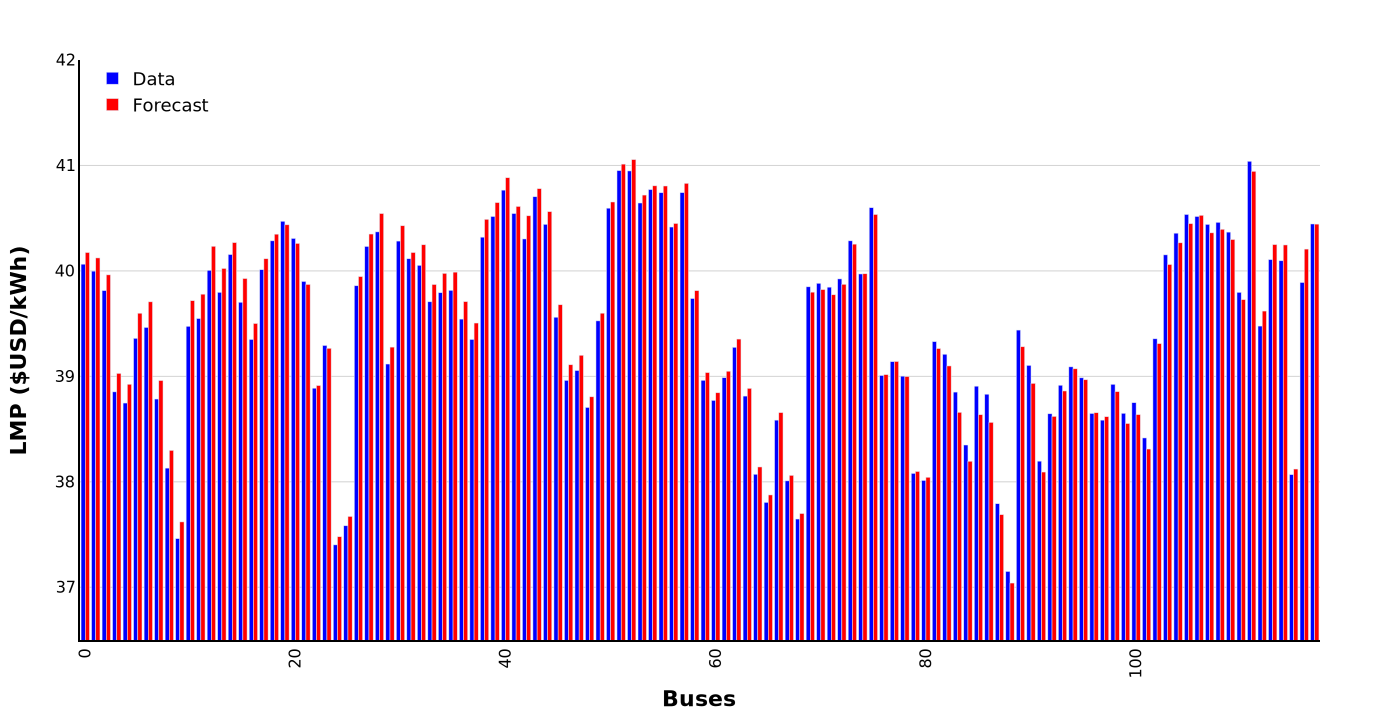

In [21]:
figLMP = px.bar(x=list(range(0, 118)), y=[Y[0, :], y_pred_ind[0, :]],
                color_discrete_sequence=["blue","red"], barmode='group', labels=["3","2"])
figLMP.update_layout(width=1400, height=720,
                     paper_bgcolor='rgba(0,0,0,0)',
                     plot_bgcolor='rgba(0,0,0,0)',
                     yaxis=dict(
                        title='<b>LMP ($USD/kWh)</b>',
                        titlefont_size=22,
                        tickfont_size=16,
                        color="black",
                        range=[36.5, 42]
                     ),
                     xaxis=dict(
                        title='<b>Buses</b>',
                        titlefont_size=22,
                        tickfont_size=16,
                        color="black",
                        tickangle=270
                     ),
                     legend=dict(
                         x=0.01,
                         y=1.0,
                         font=dict(size=18, color="black")
                     ),legend_title="")
figLMP.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
figLMP.update_yaxes(showline=True, linewidth=2, gridcolor='lightgray', linecolor='black', mirror=False)
newnames = {'wide_variable_0':'Data', 'wide_variable_1': 'Forecast'}
figLMP.for_each_trace(lambda t: t.update(name = newnames[t.name]))
figLMP.show("svg")